<a href="https://colab.research.google.com/github/pterw/Genomic-Projects/blob/Assignments/Final_8605690.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identify yourself here:

Student name: Peter Wiercioch

Student number: 8605690

# BIO3360 Final Exam#

#Instructions#

This final exam has 5 questions, whose point values are indicated below, for a total of 30 points (30% of your final grade) It has the same format as   assignments and midterm, as such the question style and expected answer format should be familiar to you by now. Over the past months, you have worked hard to develop programs and solutions for many problems similar to those found here. Some codes you wrote in the past will surely help you!

YOU HAVE 48HRS TO COMPLETE AND SUBMIT THE EXAM (FIRM). **Students registered with the SASS are asked to contact me directly before the exam. **

THIS IS A FINAL EVALUATION THAT MUST BE DONE ALONE. **Copy-pasting code found online or between each other will be considered as plagiarism. And this is easy to verify** (Already happened this semester - so trust me!).  

**Please use the Google Form tab to submit your file, as you did with your weekly assignments.  In addition to your information (Name, Student number), your Colab notebook has to be uploaded below according to specific guidelines: All submitted files MUST have the following format or will be rejected: Final - Student Number. (e.g. Final - 123456789 ). Your name and file type will be added automatically once you submit the form. Make sure the .ipynb extension appears after your file name, otherwise add it manually. PLEASE SUBMIT ONLY ONE FORM!  **

Below is a series of questions that need to be answered. Your "answers" are to be written in the code cells below the question statements. To get points, the output of your code cell must match the expected answer. If you need to anotate your code cell, or make comments use `#` before your comment. The line will be ignored by the compiler, but remain visible. E.g. `#this is a comment`

First, please write your name and student number in the text cell above.

Have fun! :-)

## Question 1 (6 points)

You are the chief public health officer of a small town, in charge of managing local public health policies and sanitary measures during the Covid-19 pandemic. Its is up to you whether to recommend a lockdown, or conversely, to loosen restrictions in the population. 

Test centers are sending you two daily updates, at noon and midnight, updating your office with the most recent recorded number of cases. Over the last 28 days, here is the data that was collected:`please run the code cell below`

days T = [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5]
Number of detected covid-19 cases P= [ 5.22000532  4.86256591  7.82353858  7.5226907   5.1920081   6.01087761
  5.06623593  7.32794457  5.11431603  7.0276132   8.91751919  5.91471645
  8.28865972  6.81327945  7.21144107  8.45703313 10.13448705  8.55530723
  9.20146514 12.51135364 11.42547169 13.09111523 11.84180759 10.66648722
  9.98089952 14.49293049 12.63167137 14.50590607 16.49198551 16.9720369
 16.5341224  18.93236128 15.60952104 16.10776188 18.21196887 19.20593645
 21.56239643 20.82911274 24.53828745 22.77504982 22.67372644 25.46918242
 27.8242327  26.74063918 28.80097951 33.01261108 32.57715977 32.3987639
 37.0846033  36.74926501 40.26075308 42.45134392 41.55368095 46.58680723
 48.72266237 4

Text(0, 0.5, 'Number of detected covid-19 cases (Array P)')

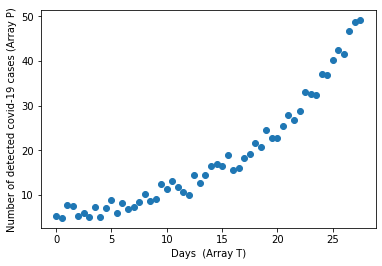

In [ ]:
#@title Data
import numpy as np
from matplotlib import pyplot as plt
Noise_intensity = 5
A = 3
B = 0.1

T=np.arange(0,28,0.5 )# your aray of injected currents
P=np.zeros(len(T)) # your recorded membrane voltage
Noise = np.random.rand(len(T))
for i in range(len(T)) :
  P[i] = A*np.exp(B*T[i])+Noise_intensity*Noise[i]
print('days T =',T)
print('Number of detected covid-19 cases P=',P)
plt.plot(T,P,'o')
plt.xlabel('Days  (Array T)')
plt.ylabel('Number of detected covid-19 cases (Array P)')





The Mayor is asking for your opinion on the best way to proceed in the upcoming months, including whether or not reinforce restrictions, and to which extent. You need to fit the data to make evidence based decisions and predict the evolution of the future number of cases solely based on available data. 

The data has been saved into two arrays: `P`(number of cases) and `T` (time/days). The dimensions of these arrays are `len(P)=len(T)= 28/0.5=56`.

a) (0.5 point) Based on what weve learned about the epidemiology models and population growth models, what is the most likely model underlying the trend observed in the data? (e.g. Linear, quadratic, logarithmic?)

b) (1 question) Assuming exponential growth, a good model for the ground truth $P$ would then be $\tilde P=A e^{B T}$ with parameters $a$ and $b$. However, fitting exponential functions with gradient descent is notoriouly challenging, because of the extremely fast fluctuations in the gradient, and multiple optima. One trick is to take the natural logarithm to obtain a linear function of time instead:

$$ln[\tilde{P}] = ln[A]+B T= a + bT \space   \space \space\space\space\space\space(1)$$

with $a=ln[A]$ and $b=B$. In that case, it would make sense to minimize the mean square error(MSE) between $ln[\tilde{P}]$ and $ln[P]$. 

Compute the gradient of the MSE as a function $a$ and $b$ and create functions called `Grad_a_MSE(X,Y,param1, param2)` and `Grad_b_MSE(X,Y,param1, param2)` that take into inputs arrays `X` and `Y` as well as two parameters `param1` and `param2` and ouputs the gradient, assuming a linear function as per Eq. (1) above.  

c) (1 point) Using gradient descent, with learning rates $\epsilon_a=\epsilon_b=0.001$ and 10000 epochs, find the values of a and b. Choose initial values for $a$ and $b$ arbitrarily within the interval [-10,10]. (HINT: the natural logarithm of `x` is `np.log(x)`) 

d) (1 point) Plot your fitted model (i.e. $\tilde{P}$ vs $T$ with parameters $a$ and $b$) alongside the data (i.e. $P$ versus $T$). Is the fit good? Don't forget axis labels and title. (HINT: Your cuves and data should be exponentially looking, dont forget the natural logarithm was taken above to perform gradient descent) 

e) (1 point) A stressed out mayor is asking you how long before the city has 100 cases (starting at day 0). Use your fitted model to answer the question. 

f) (1 point) Let us assume 10% of covid-19 cases require more intensive medical care.  Given a limit of 20 beds in the local hospital, what must be the exponential growth rate $b$ so that the local hospital doesnt run out of available beds in the next 100 days (starting at 0) when more beds will be delivered? Use your fitted model to answer the question. 

g) (0.5 point) A convex optimization problem is based on a convex cost function. Convexity is garanteed if the second derivative of a cost function, with respect to a given parameter, is always positive or zero. Using a linear model $\tilde{Y}=aX$, prove that the $MSE(\tilde{Y},Y)$ is convex in the parameter a. `Answer using a text cell.`

1.4771383585130662
0.08293645716670828
On day 37.8 there will be approximately 100 cases


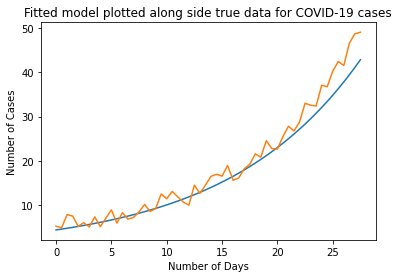

In [ ]:
#a) The most likely model underlying the trend observed in the data is exponential.

#b)
import numpy as np
import matplotlib.pyplot as plt

def Grad_a_MSE(X,Y,param1,param2):
  error = 0
  N=len(X)
  for i in range(len(X)):
    error = error + 2/N * (param1 + param2*X[i]-np.log(Y[i]))
  return error

def Grad_b_MSE(X,Y,param1,param2):
  error = 0
  N = len(X)
  for i in range(len(X)):
    error = error + 2/N * X[i] * (param1 + param2*X[i]-np.log(Y[i]))
  return error

#c)

a = 1 #arbitrary values for a and b
b = 1

epochs = 10000
epsilon_a=0.001
epsilon_b=0.001

it=np.arange(0,10000,1)

A=np.zeros(epochs)
B=np.zeros(epochs)
P_hat = (a)+b*T 

for i in range(epochs):

  a=a-epsilon_a*Grad_a_MSE(P_hat,P,a,b)
  b=b-epsilon_b*Grad_b_MSE(P_hat,P,a,b)
  A[i]=a
  B[i]=b

print(a)
print(b)

#d) The fit is good, it matches the growth curve of the true case data.

P_est = np.exp(a+b*T)
plt.plot(T,P_est)
plt.plot(T,P)
plt.title('Fitted model plotted along side true data for COVID-19 cases')
plt.ylabel('Number of Cases')
plt.xlabel('Number of Days')

#e) At approximately day 38, there will be 100 cases in the town.

t=np.arange(0,100,0.1)
for i in range(len(t)):
  if 99.9<np.exp(a+b*t[i])<101:
    print('On day',i/10,'there will be approximately 100 cases')



In [ ]:
print((np.log(200/np.exp(a)))/100)

0.0382117900803497


In [ ]:
#f) b should not exceed the final number printed

a = 1 
b = np.arange(0,1,0.1)

epochs = 10000
epsilon_a=0.001
epsilon_b=0.001

A=np.zeros(epochs)
B=np.zeros(epochs)

for j in range(len(b)):
  for i in range(epochs):
    a=a-epsilon_a*Grad_a_MSE(P_hat,P,a,b[j])
    b=b-epsilon_b*Grad_b_MSE(P_hat,P,a,b[j])
    A[i]= a
    B[i]= b[j]
  time = np.arange(0,100,1)
  for k in range(len(time)):
    if 19<(0.1*np.exp(a+b[j]*time[k]))<=20:
      print(b[j])
      if b[j] == b[j-1]:
        break

0.08290949063440459
0.08266797865571601
0.08266558327738464
0.08266555951940206
0.08266555928376419
0.08266555928142713
0.08266555928140416
0.08266555928140393
0.08266555928140393
0.08266555928140393


g)

Deriving partial derivative of cost function
$MSE\left(\hat{Y},Y\right)=\frac{1}{N}\sum_{i=1}^N{{
  (aX_i-Y_i)}^2} $

First Partial Derivative with respect to a:

$MSE\left(\hat{Y},Y\right)=\frac{2}{N}\sum_{i=1}^N{{
  X(aX_i-Y_i)}} $

Second partial derivative with respect to a:

$MSE\left(\hat{Y},Y\right)=\frac{2}{N}\sum_{i=1}^N{{
  X_i^2}} $

Because of the square in the second partial derivative, all numbers whether positive or negative will yield a value greater or equal to zero. This means this function is indeed convex in the parameter a. A function is said to be convex if $f''(\theta)>0$ for all $\theta$ in a given domain, and this function meets this criteria

##Question 2 (6 points)


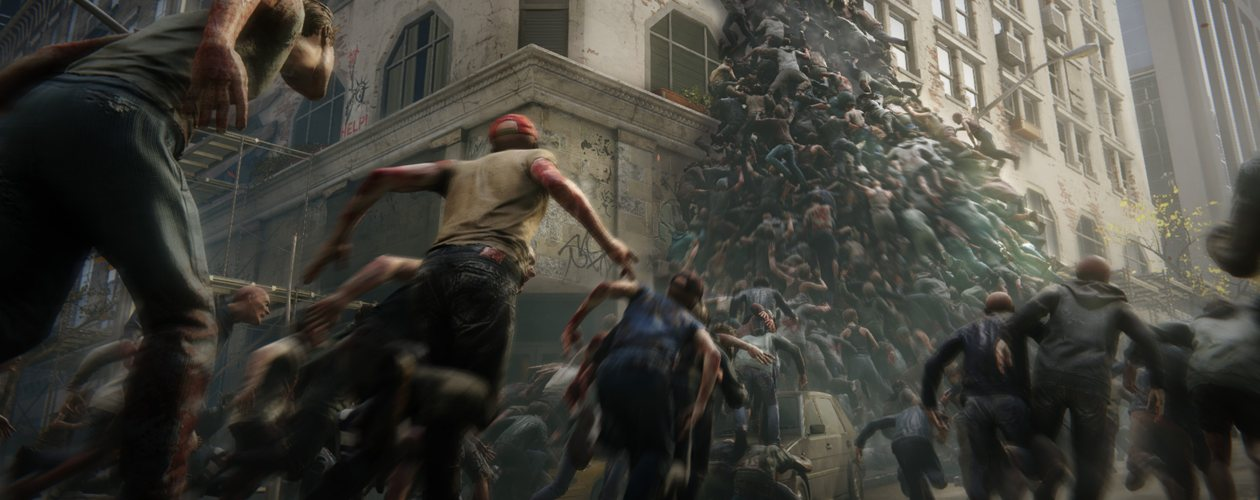

BRAAAAAAINNNNNNNSSSSSSS! 
(Image taken from World War Z movie)

Zombies are a popular figure in pop culture/entertainment and they are usually portrayed as being brought about through an outbreak or epidemic. A zombie is a reanimated human corpse that feeds on living human flesh. Stories about zombies originated in the Afro-Caribbean spiritual belief system of Vodou. The followers of Vodou believe that a dead person can be revived by a sorcerer. After being revived, the zombies remain under the control of the sorcerer because they have no will of their own. A popular belief in the Middle Ages was that the souls of the dead could return to earth one day and haunt the living. In France, during the Middle Ages, they believed that the dead would usually awaken to avenge some sort of crime committed against them during their life. Modern zombies (the ones illustrated in books, films and games) are very different from the voodoo and the folklore zombies. Modern zombies follow a standard, as set in the movie Night of the Living Dead. The ghouls are portrayed as being mindless monsters who do not feel pain and who have an immense appetite for human flesh. Their aim is to kill, eat or infect people.

When a susceptible individual is bitten by a zombie, it leaves an open wound. The wound created by the zombie has the zombie’s saliva in and around it. This bodily fluid mixes with the blood, thus infecting the (previously susceptible) individual. There is then a latent period of zombification, whereby humans are infected, but not infectious, before becoming undead. Once the zombification period is over, zombies hunt and try to eat/bite susceptible individuals - and the process starts again. Of course, susceptible individuals are fiercely fighting back, resisting by trying to kill as many zombies as possible to prevent being infected. (Special thanks to Prof Stacey Smith? for sharing some of this material: https://mysite.science.uottawa.ca/rsmith43/zombies.pdf )

We can use the SIR formalism to model a zombie epidemic. Consider the following variables:  $S$ :Number of susceptible individuals;  $I$ : number of infected individuals; and  $Z$ : number of zombies. We can then write the following system of ordinary differential equations - called the SIZ model -

$$\frac{dS}{dt}=−aSZ$$ 

$$\frac{dI}{dt}=aSZ−bI $$

$$ \frac{dZ}{dt}=bI−dSZ $$

where the parameter  $a>0$  refers to the infection rate,  $b>0$  the zombification rate and  $d>0$  the resistance rate. Those parameters are rates, and will here be expressed in units of days^-1 (or "per day").

Let us transport ourselves in the last human outpost, Point Zero, a fortified town with  $N=$20000  survivors. At 2:08am, a survivor who was bitten while out on patrol returns to the town...

a) (1 point) Assume that $ d=0 $, and that $ S+I+Z=N $ is always preserved, find the fixed points of the SIZ model.

b) (1 point) Assume for a moment that the number of zombies is constant i.e.  $Z=Zo$  and consider only the first equation of the SIZ model above. What is the fixed point of this ODE? Is it stable, or unstable, and why? Solve analytically (using math) the equation.

c) (1.5 point) Using the Euler method, and for the following values of the parameters

$$a=0.01$$ 
$$b=1/14 $$
$$d=0.005 $$

plot the evolution of the variables $ S(t)$ ,  $I(t)$  and  $Z(t)$  at Point Zero starting at 2:08am, for a period of 365 days, with  $dt=0.1$ day. Is  $S+I+Z$ conserved here? Why? Make sure your initial conditions are correct (read question carefully!) and dont forget axes labels and title.

d) (1.5 point) At what value of the resistance rate  d  is the zombie epidemic of Point Zero controlled? (HINT: Consider the fixed point, especially equations  $dI/dt=0$  and  $dZ/dt=0$  together - what do these equation say about the parameters  $a$  and  $d$ ?)

e) (1 point) Scientists of the base have designed a stroboscopic projector, which flashes light with variable frequencies, which cause the Zombies to turn against each other. The zombies still hunt and infect the susceptible humans, but they now also eat each other. Assuming this device leads to a decrease in zombie population at a rate  $e=25$ , modify the SIZ model above and implement this change. Then, simulate the system again for a period of 365 days with  $dt=0.1$ , including axis labels and title. How many surivors are left at the end of the year? 
(Hint: you need to modify the $dZ/dt$ equation and include an exponenetial decay term propotional to $Z$ with rate $e$)

In [ ]:
#a) fixed points assuming d = 0

# dS/dt = 0 = -aSZ: fixed points at S = 0 and Z = 0
# dI/dt = 0 = aSZ - bI: fixed points at I = aSZ/b, Z = bI/aS, S = bI/aZ
# dZ/dt = 0 = bI - dSZ: fixed point at I = 0

#S = (0, bI/aZ) I = (aSZ/b, 0) Z = (0, bI/aS)

#b) S = 0,0,20000 is the fixed point. 

# 0 = -aSZo 

# Deriving the flow with respect to the state variable S.
# d/dS(-aSZ) = -aZ
# parameter a = 0.01, eigenvalue does not depend on Z.
# -(0.01) < 0, therefore the fixed point is stable
  
#c) Here S+I+Z is not conserved, as the goal of the zombies is to either kill eat or infect people. Because of that, the S+I+Z is not conserved because people were either eaten or killed instead of being infected (resistance rate)

import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
tmax = 365

t=np.arange(0,tmax,dt)

S = np.zeros(len(t))
I = np.zeros(len(t))
Z = np.zeros(len(t))

a=0.01
b=1/14
d=0.005

S[0] = 20000-1
I[0] = 1
Z[0] = 0

for i in range(len(t)-1):
  S[i+1] = S[i] + dt * ((-a)*S[i]*Z[i])
  I[i+1] = I[i] + dt * ((a*S[i]*Z[i])-(b*I[i]))
  Z[i+1] = Z[i] + dt * ((b*I[i])-(d*S[i]*Z[i]))

plt.plot(t,S, label='S[t]')
plt.plot(t,I, label='I[t]')
plt.plot(t,Z, label='Z[t]')
plt.title('SIZ model of zombies in a town')
plt.xlabel('Time (days)')
plt.ylabel('Individuals')
plt.legend()
plt.show()

#d) Epidemic controlled at a resistance rate of d = a. This means that when d = 0.01 the epidemic is controlled.

# Considering from fixed points:
# bI = aSZ and bI = dSZ
# aSZ = dSZ; therefore a = d

dt = 0.01
tmax = 365

t=np.arange(0,tmax,dt)

S = np.zeros(len(t))
I = np.zeros(len(t))
Z = np.zeros(len(t))

a=0.01
b=1/14
d=0.01

S[0] = 20000-1
I[0] = 1
Z[0] = 0

for i in range(len(t)-1):
  S[i+1] = S[i] + dt * ((-a)*S[i]*Z[i])
  I[i+1] = I[i] + dt * ((a*S[i]*Z[i])-(b*I[i]))
  Z[i+1] = Z[i] + dt * ((b*I[i])-(d*S[i]*Z[i]))


plt.plot(t,S, label='S[t]')
plt.plot(t,I, label='I[t]')
plt.plot(t,Z, label='Z[t]')
plt.title('SIZ model of zombies in a town where d = a')
plt.xlabel('Time (days)')
plt.ylabel('Individuals')
plt.legend()
plt.show()

#e) There will be 396 survivors left at the end of the year

import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
tmax = 365

t=np.arange(0,tmax,dt)

S = np.zeros(len(t))
I = np.zeros(len(t))
Z = np.zeros(len(t))

a=0.01
b=1/14
d=0.005
e=25

S[0] = 20000-1
I[0] = 1
Z[0] = 0

for i in range(len(t)-1):
  S[i+1] = S[i] + dt * ((-a)*S[i]*Z[i])
  I[i+1] = I[i] + dt * ((a*S[i]*Z[i])-(b*I[i]))
  Z[i+1] = Z[i] + dt * ((b*I[i])-(d*S[i]*Z[i])-e*Z[i])

print(S[-1])

plt.plot(t,S, label='S[t]')
plt.plot(t,I, label='I[t]')
plt.plot(t,Z, label='Z[t]')
plt.title('SIZ model of zombies in a town with stroboscopic projector')
plt.xlabel('Time (days)')
plt.ylabel('Individuals')
plt.legend()
plt.show()


## Question 3 (6 points) 

Oscillatory bursting is a peculiar form of neural action potential discharge pattern that is observed in a wide variety of brain systems, notably the hippocampus of mammals. Instead of firing action potentials at a steady rate, neurons produce action potentials in "groups" - a brief sequence of temporally clustered action potentials, which repeat periodically. This type of firing activity, notably displayed by the pyramidal neurons of the CA3 region of the hippocampus give rise to the famous theta ($\theta$) rhythm. This oscillatory activity has been linked to memory encoding and spatial navigation in rodents and humans alike, although the mechanisms involved are still much debated by neuroscientists. A neural burst firing pattern is plotted in the figure below:


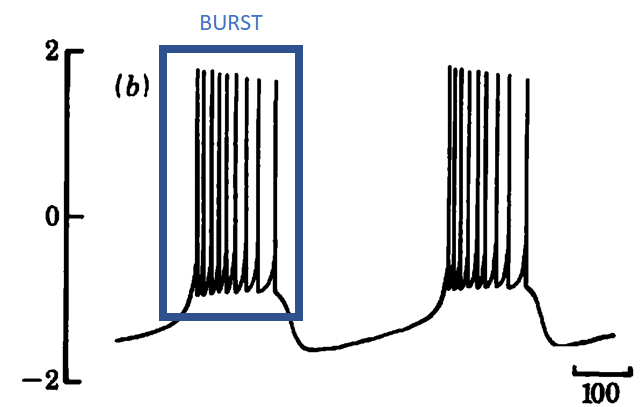


To model this type of firing activity, [JL Hindmarsh and RM Rose](https://royalsocietypublishing.org/doi/pdf/10.1098/rspb.1984.0024?casa_token=ZSkGQniiwB8AAAAA:UlF7TpssDGALsg9hffVPeCwtZegvWmZnz3egWKAd7XN8F2EDPdCzacjMPyDUkneWGKECtTc08wXj5eHK) developped in 1894 a qualitative mathematical model of neuronal bursting, inspired by both Fitzhugh-Nagumo and Hodgkin–Huxley models. The so-called Hindmarsh-Rose model obeys the following set of non-dimensional (i.e. unitless) first order differential equations


$$\frac{d}{dt} x(t) = y(t)-a x^3(t)+b x^2(t)-z(t)+I$$

$$\frac{d}{dt} y(t) = c-d x^2(t)-y(t)$$
 
$$\frac{d}{dt} z(t) = r(s(x(t)-x_r)-z(t))$$

With the parameters $a,b,c,d,r,s, x_r$ and the synaptic input $I$. The relevant observable variable is the *membrane potential*, $x(t)$. There are two more variables, $y(t)$ and $z(t)$, which take into account the transport of ions across the membrane through  ion channels. The transport of sodium  (Na+) and potassium (K+) ions through the ion channels is modelled by the variable $y(t)$, which is called the *spiking variable*. The variable $z(t)$ corresponds to an *adaptation current* - through which the membrane potential is damped, representing the slow habituation of neurons to constant stimulim. It represents the slow fatigue of ion channels after sustained ion transit.  Parameter values used are:

$$a=1$$
$$b=2.9$$
$$c=1$$
$$d=5$$
$$s=10$$
$$x_r=-6/5$$
$$r=0.001$$
$$I=variable$$

a) (1 point) Let us first neglect the adaptation current by setting $r=0$ which means $z(t)=0$. This means the Hindmarsh-Rose model becomes two dimensional, in $x$ and $y$ only. Assuming $c=0$ and $I=0$, compute (mathematically) and plot the nullclines of $x$ and $y$ with $x$ ranging from -3 to 3 by steps of 0.1. `write your answer as a comment in a code cell below`

b) (1 point) Assuming again that $r=0$ (i.e. $z(t)=0$),  $c=0$ and $I=0$, compute the fixed point(s). How many fixed point(s) are there? 

c) (1 point) In two dimensions, the stability of fixed points is determined by computing eigenvalues of the Jacobian matrix (matrix of derivatives). If all eigenvalues are negative, a fixed point is said to be **stable**. If they are all positive, the fixed point is said to be **unstable**. If the set of eigenvalues is composed of positive and negative eigenvalues, we then have what we call a **saddle**.

For $r=0$, $c=0$ and $I=0$ the expression for the eigenvalues $\lambda_{\pm}$ (there are two) for the Hindmarsh-Rose model are given by

$\lambda_{\pm}=-3/2\,a{x_o}^{2}+bx_o-1/2\pm1/2 \sqrt {9\,{a}^{2}{x_o}^{4}-12\,ab{x_o}^{3}+4\,{
b}^{2}{x_o}^{2}-6\,a{x_o}^{2}+4\,bx_o-8\,dx_o+1}$

where $x_o$ corresponds to the value of $x$ at the fixed point(s) found in b). Using this expression, and the parameter values given (remembering  $r=0$, $c=0$ and $I=0$), determine the type stability of the fixed point(s) found in b).

d) (1 point) Oscillatory Bursting in the Hindmarsh-Rose model occurs because of the presence of a limit cycle - an oscillatory solution that emerges due to the cubic non-linearity. For $r=0$, $c=0$ and $I=0$, plot the flow of the system in the $x$ and $y$ plane, alongside the nullclines computed in a). Use initial conditions ranging from -3 to 3 by steps of 0.5 for $x$, and -30 to 3 by steps of 0.5 for $y$. Integrate your equations using the Euler method for a short time $T=0.5$ms with steps of $dt=0.01$.

e) (1 point) Using the Euler method and the parameter values in the Question Statement above part a (i.e. here $s$ and $c$ are *NOT* zero), plot the time evolution of the memebrane potential $x(t)$ over a period of $T=2000$ms with $dt=0.01$ for I=0.2. Initial conditions are $x(0)=1$, $y(0)$ and $z(0)=0$. Don't forget title and axes labels. 

f) (1 point) Using the code developed in e), compute and plot 1) the number of spikes; and 2) the number of bursts; as a function of inputs $I$ ranging from -2 to 2 by steps of 0.2. Use a total time of T=1000ms with dt=0.01. Comment on the effect of inputs on bursting and spiking. 
(HINT: define variables `threshold_spike=1.0` and `threshold_burst=-1.2`, and at every time step, check whether `(x[t+1]>threshold_spike and x[t]<threshold_spike)`. If you examine this closely, you'll notice that this will detect times where the membrane voltage $x$ crosses the value of `threshold_spike` from below. The same logic applies for `threshold_bursts`, only based on a different value. Once a spike or burst is detected, you can simply count the number of each during the total period of the simulation, and repeat for a different value of `I`).



a)

Nullclines assuming r = 0, z(t) = 0, c = 0 and I = 0

$$\frac{d}{dt} x(t) = y(t)-a x^3(t)+b x^2(t)-0+0$$

Setting to 0 & neglecting current adaptation (z(t) = 0) and I = 0

$$0 = y-a x^3+b x^2$$

x nullcline at $y = ax^3-bx^2$

Nullclines assuming r = 0, z(t) = 0, c = 0 and I = 0

$$\frac{d}{dt} y(t) = c-d x^2(t)-y(t)$$

Setting to 0 & neglecting adaptation currrent with z(t) = 0 and c = 0 and I =0

$$0 = 0 -d x^2-y$$

$$y = -dx^2$$

y nullcline at $ y = -dx^2$


The eigenvalues for the first fixed point (0,0) are 0.0 and -1.0
The eigenvalues for the second fixed point (-2.1, -22.05) are -2.3802909969828736 and -24.029709003017125


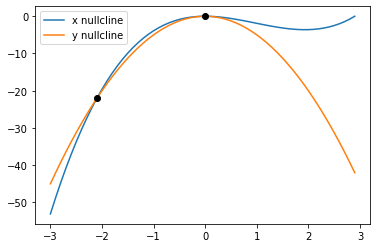

In [ ]:
#a)
import numpy as np
import matplotlib.pyplot as plt


a=1
b=2.9
c=1
d=5
s=10
xr=-6/5
r=0.001

dt = 0.1

x=np.arange(-3,3,dt)
y=np.arange(-3,3,dt)

plt.plot
null_x1=(x**3)-(b*x**2)
null_y2=-d*x**2

plt.plot(x,null_x1, label='x nullcline')
plt.plot(x,null_y2, label='y nullcline')
plt.plot([0], [0], 'ko')
plt.plot([-2.1], [-22.05], 'ko')
plt.plot()
plt.legend()

#b)
#fixed points at (0,0) and (-2.1,-22.05), there are 2 fixed points

# equating nullclines
# x^3 - 2.9x^2 = 5x^2
# x^3 - (29x^2/10) = 5x^2
# x^3 - (29x^2/10) - 5x^2 = 0
# x^3 - (21x^2/10) = 0

#factoring out x^2 and constants & multiplying both sides by 10
# x^2(10x+21) = 0

#x^2 = 0 or 10x+21 = 0

#square root of both sides for x^2 = 0

#x = 0

#rearranging other requation

#10x = -21
#x = -21/10
#x = -2.1

# roots = 0, -2.1, 

# x = 0, x = -2.1

#substituting 0 in (x^3)-(2.9x^2) for y
# (0^3)-(2.9(0)^2) 
# y = 0

#substituting -2.1 in -5x^2 for y
# -5(-2.1)^2
# y = -22.05

#fixed points at (0,0) and (-2.1,-22.05)
 
#c) Fixed point (0,0) is a saddle (eigenvalues are of 0 and -1), fixed point (-2.1,-22.05) is stable (all eigenvalues are negative)

x = 0
eigenvalue = ((-3/2)*a*(x**2) + (b*(x)) -(1/2)) + ((1/2)*np.sqrt((9*(a**2)*(x**4)) - (12*a*(x**3)) + (4*(b**2)*(x**2)) - (6*a*(x**2)) + (4*b*x) - (8*d*x) + 1))
x = 0
eigenvalue1 = (-3/2)*a*(x**2) + b*(x) -(1/2) - (1/2)*np.sqrt((9*(a**2)*(x**4)) - (12*a*(x**3)) + (4*(b**2)*(x**2)) - (6*a*(x**2)) + (4*b*x) - (8*d*x) + 1)

print('The eigenvalues for the first fixed point (0,0) are',eigenvalue,'and',eigenvalue1)

x = -2.1
eigenvalue2 = ((-3/2)*a*(x**2) + b*(x) -(1/2)) + (1/2)*np.sqrt((9*(a**2)*(x**4)) - (12*a*(x**3)) + (4*(b**2)*(x**2)) - (6*a*(x**2)) + (4*b*x) - (8*d*x) + 1)
x = -2.1
eigenvalue3 = (-3/2)*a*(x**2) + b*(x) -(1/2) - (1/2)*np.sqrt((9*(a**2)*(x**4)) - (12*a*(x**3)) + (4*(b**2)*(x**2)) - (6*a*(x**2)) + (4*b*x) - (8*d*x) + 1)

print('The eigenvalues for the second fixed point (-2.1, -22.05) are',eigenvalue2,'and',eigenvalue3)


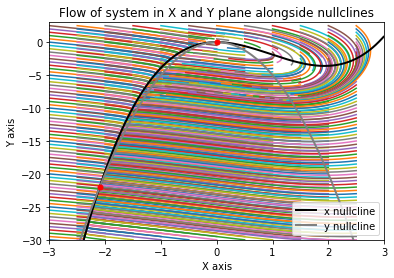

In [ ]:
#d)
import numpy as np
import matplotlib.pyplot as plt

dt=0.01
time=np.arange(0,0.5,dt)
x=np.zeros(len(time))
y=np.zeros(len(time))
z=np.zeros(len(time))

a= 1
b = 2.9
c = 0
d = 5
s = 10
xr = -6/5
r = 0
I=0

for i in np.arange(-3,3,0.5):
  for j in np.arange(-30,3,0.5):
    for t in range(len(time)-1):
        x[0] = i
        y[0] = j
        x[t+1] = x[t] + dt * (y[t] - a*x[t]**3 + b*x[t]**2)
        y[t+1] = y[t] + dt * (-d*x[t]**2 - y[t])

    plt.plot(x, y)
  
x=np.arange(-3,3,dt)
y=np.arange(-30,3,dt)

null_x1=(x**3)-(b*x**2)
null_y2=-d*x**2

plt.plot(x,null_x1, label='x nullcline', color='black',linewidth=2)
plt.plot(x,null_y2, label='y nullcline', color='gray',linewidth=2)
plt.plot([0], [0], marker='o', markersize=5, color="red")
plt.plot([-2.1], [-22.05], marker='o', markersize=5, color="red")
plt.xlim(-3,3)
plt.ylim(-30,3)
plt.legend()
plt.title('Flow of system in X and Y plane alongside nullclines')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

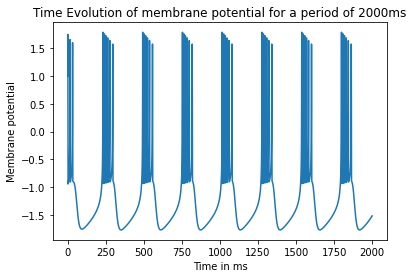

In [ ]:
#e)

import numpy as np
import matplotlib.pyplot as plt

tmax = 2000
dt = 0.01
time = np.arange(0,tmax,dt)
x = np.zeros(len(time))
y = np.zeros(len(time))
z = np.zeros(len(time))

a = 1
b = 2.9
c = 1
d = 5
s = 10
xr = -6/5
r = 0.001
I = 0.2

x[0] = 1
y[0] = 0
z[0] = 0

for t in range(len(time)-1):
  x[t+1] = x[t] + dt * (y[t] - (a * (x[t]**3)) + (b * (x[t]**2)) - z[t] + I)
  y[t+1] = y[t] + dt * (c - (d * (x[t]**2)) - y[t])
  z[t+1] = z[t] + dt * (r * (s * (x[t] - xr) - z[t]))

plt.plot(time,x)
plt.ylabel('Membrane potential')
plt.xlabel('Time in ms')
plt.title('Time Evolution of membrane potential for a period of 2000ms')
plt.show()


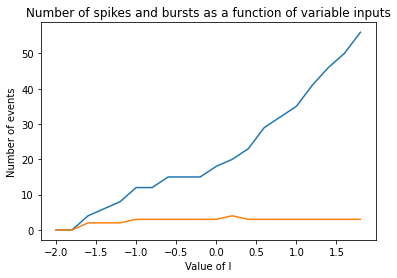

Number of spikes: 56.0
Number of bursts: 3.0


In [ ]:
#f) As the input increases, so does the number of spikes. The number of spikes is 56 and the number of bursts is 3.
import numpy as np
import matplotlib.pyplot as plt

tmax = 1000
dt = 0.01
time = np.arange(0,tmax,dt)


x = np.zeros(len(time))
y = np.zeros(len(time))
z = np.zeros(len(time))

a = 1
b = 2.9
c = 1
d = 5
s = 10
xr = -6/5
r = 0.001
I = np.arange(-2,2,0.2)

threshold_spike = 1.0
threshold_burst = -1.2

x[0] = 1
y[0] = 0
z[0] = 0

S = np.zeros(len(I))
B = np.zeros(len(I))

for i in range(len(I)):
  spike_count = 0
  burst_count = 0
  for t in range(len(time)-1):
    x[t+1] = x[t] + dt * (y[t] - (a * (x[t]**3)) + (b * (x[t]**2)) - z[t] + I[i])
    y[t+1] = y[t] + dt * (c - (d * (x[t]**2)) - y[t])
    z[t+1] = z[t] + dt * (r * (s * (x[t] - xr) - z[t]))
    if x[t+1]>threshold_spike and x[t]<threshold_spike:
      spike_count+=1
      S[i]=spike_count
    if x[t+1]>threshold_burst and x[t]<threshold_burst:
      burst_count+=1
      B[i]=burst_count
plt.plot(I,S)
plt.plot(I,B)
plt.title('Number of spikes and bursts as a function of variable inputs')
plt.ylabel('Number of events')
plt.xlabel('Value of I')
plt.show()

print('Number of spikes:',S[-1])
print('Number of bursts:',B[-1])

###Question 4 (6 points)

The sleep-wake cycle is a dynamic phenomenon observed in most animals, resulting from complex interactions between the activity of neuronal populations across multiple brain structures. In mammals, the sleep-wake cycle is controlled by the circadian rhythms, allowing stereotypical transitions between different phases or states, namely wakefulness, REM (rapid eye movement) and NREM (non-rapid eye movement) sleep. The circadian oscillator solicits specific molecules (e.g. hypocretins - also called orexins) and hormones (e.g. melatonin) to promote the transitions between sleep-wake states. While the circadian rhythms are endogeneous (i.e. based on intrinsic neurophysiological processes), they are also influenced by extrinsic cues (e.g. temperature, light). 

Although the presence of changes in sleep stages distribution during light and dark cycles is a clear indication of the existence of time-dependent variations in sleep architecture, transitions between sleep-wake states show a high degree of apparently random variability, suggesting that statistical tools - such as Amrkov models -are a useful way for studying and modelling sleep dynamics.

In a set of experiments, the sleep-wave transitions in anesthesized mice we monitored using an electroencephalogram (EEG), whose properties exhibits remarkable differences across wakefulness and sleep stages. The mice were exposed to 12h periods of darkness and light to investigate the influence of those extrinsic cues on sleep-wake dynamics. Using the EEG, probabilities of transitions between prolongated wakefulness (0), REM(1), NREM(2) and brief wakefulness(3) were computed, in each case (dark/light). They are given by:


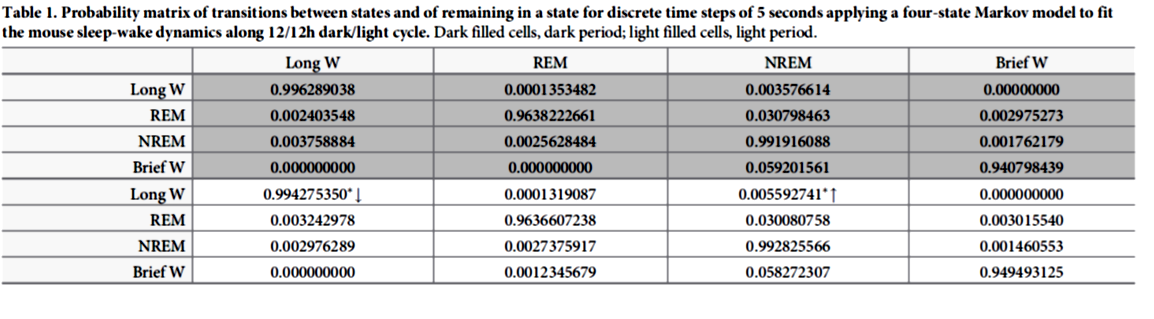

Given those probabilities, we may model the sleep transitions by the following four state Markov chain model:

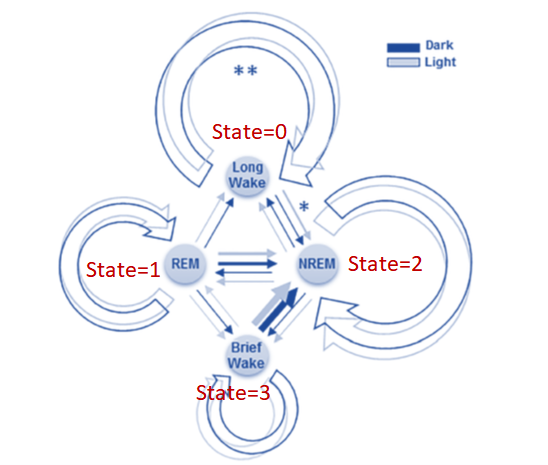

Reference: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0189931 



a) (1 point) Create two matrices, called `P_light` and `P_dark` which contains the probability of transitions above. The states are labelled from 0 (prolongated wakefulness), 1(REM sleep), 2(NREM) sleep and 3 (brief wakefulness). 

b) (1.5 point) Define an array `State_dark` of appropriate length, and whose value will be `0`,`1`, `2` or `3`, corresponding to the different states above. Using a Markov chain model based on the transition probabilities matrices in a), and for `State_dark[0]=0`, plot the evolution of the sleep states during exposure to darkness as a function of time for a total of 43200 seconds(8 hours) by steps of dt=5 seconds. Don't forget the title and axes labels.

HINT: Assuming you have 4 different states, and transition probabilities between all those states, you can evaluate the probability of shifting towards another state by comparing a uniform random number `prob` sampled from the interval [0,1] with the probability of transition found in your matrix `P_dark`.  Because all probabilities in a given row sums to 1, so you can use the following trick:

Let's assume that `State_dark[t]=0`. If your random number `prob` is found between 0 and $P_{00}$, then `State_dark[t+1]=0` (i.e. the sleep stage remains the same). If `prob` is instead found between $P_{00}$ and $P_{00}+P_{01}$, then `State_dark` will transition from `0` to `1` and thus `State_dark[t+1]=1`. Similarly, if `prob` is found between  $P_{00}+P_{01}$ and  $P_{00}+P_{01}+P_{02}$, `State_dark[t+1]=2`. Finally, if `prob` is between  $P_{00}+P_{01}+P_{02}$ and $1$ (remember $P_{00}+P_{01}+P_{02}+P_{03}=1$!), then `State_dark[t+1]=3`. You can easily evaluate these different conditions using an `if` statement. For instance, if `State_dark[t]=0`, you can check: `if (P[0][0]<=prob<P[0][0]+P[0][1])` and so on. 

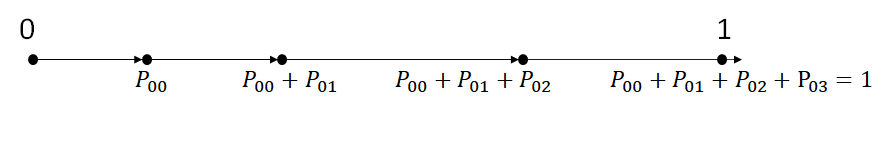

c) (1.5 point) Repeat the problem in b) for exposure to light. Define an analogous array `State_light`whose value will change in time but now as a function of `P_light`. Plot the resulting evolutions of the sleep stages. 

d) (1 point) Based on the `State_dark` and `State_light` arrays, plot and compare histograms of the **time** spent in each sleep stages for dark and light conditions. Comment on the differences. 

e) (1 point) The EEG during sleep changes. It exhibits epochs of oscillatory activity, whose frequency and amplitudes correlate with sleep cycles. During NREM sleep, prominent alpha (a characteristic 10Hz oscillation) neuroelectric activity prevails, and plays a fundamental role in cognitive processes and overal brain health. Alpha activity observed in sleep is believed to indicate strong synchrony amongst neurons, enabling processes such as homeostasis and memory consolidation. Compute and compare the total amount of time (in seconds) alpha activity was observed in the mice EEG, in both dark and light conditions. Comment on the impact of light exposure on alpha activity and resulting sleep quality. 

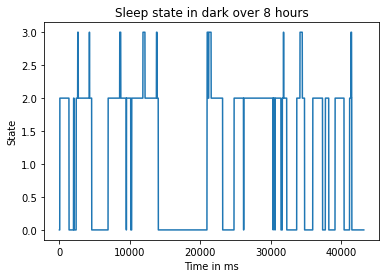

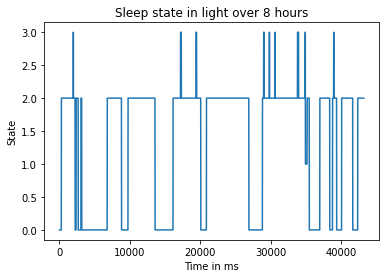

In [ ]:
#a)
import numpy as np
import matplotlib.pyplot as plt


P_dark = np.array([[0.996289038,0.0001353482,0.003576614,0.00000000],
                   [0.002403548,0.9638222661,0.030798463,0.002975273],
                   [0.003758884,0.0025628484,0.991916088,0.001762179],
                   [0.00000000,0.00000000,0.059201561,0.940798439]])

P_light = np.array([[0.994275350,0.0001319087,0.005592741,0.00000000],
                    [0.003242978,0.9636607238,0.030080758,0.003015540],
                    [0.002976289,0.0027375917,0.992825566,0.001460553],
                    [0.00000000,0.0012345679,0.058272307,0.949493125]])

#b) Plotting evolution of sleep states during exposure to darkness

tmax = 43200
dt = 5
time = np.arange(0,tmax,dt)
State_dark = np.ones(len(time))

State_dark[0]=0

for i in range(len(time)-1):
  prob = np.random.rand()
  if State_dark[i] == 0.0:
    if prob < P_dark[0][0]:
      State_dark[i+1] = 0.0
    if P_dark[0][0] <= prob < (P_dark[0][0]+P_dark[0][1]):
      State_dark[i+1] = 1.0
    if (P_dark[0][0]+P_dark[0][1]) <= prob < (P_dark[0][0]+P_dark[0][1]+P_dark[0][2]):
      State_dark[i+1] = 2.0
    if (P_dark[0][0]+P_dark[0][1]+P_dark[0][2])<= prob < 1:
      State_dark[i+1] = 3.0

  if State_dark[i] == 1.0:
    if prob < P_dark[1][0]:
      State_dark[i+1] = 0.0
    if P_dark[1][0] <= prob < (P_dark[1][0]+P_dark[0][1]):
      State_dark[i+1] = 1.0
    if (P_dark[1][0]+P_dark[1][1]) <= prob < (P_dark[1][0]+P_dark[1][1]+P_dark[1][2]):
      State_dark[i+1] = 2.0
    if (P_dark[1][0]+P_dark[1][1]+P_dark[1][2])<= prob < 1:
      State_dark[i+1] = 3.0

  if State_dark[i] == 2.0:
    if prob < P_dark[2][0]:
      State_dark[i+1] = 0.0
    if P_dark[2][0] <= prob < (P_dark[2][0]+P_dark[2][1]):
      State_dark[i+1] = 1.0
    if (P_dark[2][0]+P_dark[0][1]) <= prob < (P_dark[2][0]+P_dark[2][1]+P_dark[2][2]):
      State_dark[i+1] = 2.0
    if (P_dark[2][0]+P_dark[2][1]+P_dark[2][2])<= prob < 1:
      State_dark[i+1] = 3.0

  if State_dark[i] == 3.0:
    if prob < P_dark[3][0]:
      State_dark[i+1] = 0.0
    if P_dark[3][0] <= prob < (P_dark[3][0]+P_dark[3][1]):
      State_dark[i+1] = 1.0
    if (P_dark[3][0]+P_dark[3][1]) <= prob < (P_dark[3][0]+P_dark[3][1]+P_dark[3][2]):
      State_dark[i+1] = 2.0
    if (P_dark[3][0]+P_dark[3][1]+P_dark[3][2])<= prob < 1:
      State_dark[i+1] = 3.0

plt.plot(time,State_dark)
plt.ylabel('State')
plt.xlabel('Time in ms')
plt.title('Sleep state in dark over 8 hours')
plt.show()

#c) Exposure to light

State_light = np.ones(len(time))

State_light[0]=0

for i in range(len(time)-1):
  prob = np.random.rand()
  if State_light[i] == 0.0:
    if prob < P_light[0][0]:
      State_light[i+1] = 0.0
    if P_light[0][0] <= prob < (P_light[0][0]+P_light[0][1]):
      State_light[i+1] = 1.0
    if (P_light[0][0]+P_light[0][1]) <= prob < (P_light[0][0]+P_light[0][1]+P_light[0][2]):
      State_light[i+1] = 2.0
    if (P_light[0][0]+P_light[0][1]+P_light[0][2])<= prob < 1:
      State_light[i+1] = 3.0

  if State_light[i] == 1.0:
    if prob < P_light[1][0]:
      State_light[i+1] = 0.0
    if P_light[1][0] <= prob < (P_light[1][0]+P_light[0][1]):
      State_light[i+1] = 1.0
    if (P_light[1][0]+P_light[1][1]) <= prob < (P_light[1][0]+P_light[1][1]+P_light[1][2]):
      State_light[i+1] = 2.0
    if (P_light[1][0]+P_light[1][1]+P_light[1][2])<= prob < 1:
      State_light[i+1] = 3.0

  if State_light[i] == 2.0:
    if prob < P_light[2][0]:
      State_light[i+1] = 0.0
    if P_light[2][0] <= prob < (P_light[2][0]+P_light[2][1]):
      State_light[i+1] = 1.0
    if (P_light[2][0]+P_light[0][1]) <= prob < (P_light[2][0]+P_light[2][1]+P_light[2][2]):
      State_light[i+1] = 2.0
    if (P_light[2][0]+P_light[2][1]+P_light[2][2])<= prob < 1:
      State_light[i+1] = 3.0

  if State_light[i] == 3.0:
    if prob < P_light[3][0]:
      State_light[i+1] = 0.0
    if P_light[3][0] <= prob < (P_light[3][0]+P_light[3][1]):
      State_light[i+1] = 1.0
    if (P_light[3][0]+P_light[3][1]) <= prob < (P_light[3][0]+P_light[3][1]+P_light[3][2]):
      State_light[i+1] = 2.0
    if (P_light[3][0]+P_light[3][1]+P_light[3][2])<= prob < 1:
      State_light[i+1] = 3.0
plt.plot(time,State_light)
plt.ylabel('State')
plt.xlabel('Time in ms')
plt.title('Sleep state in light over 8 hours') 
plt.show()


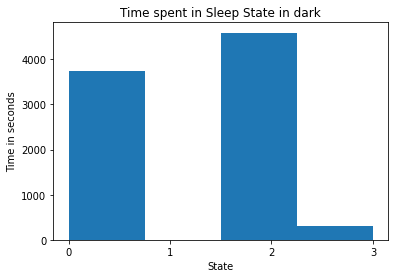

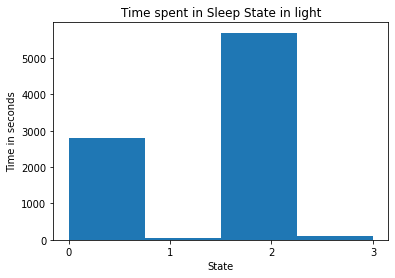

In [ ]:
#d)

# More time is spent in prolonged wakefullness (state 0) in dark than in light.
# Brief wakefulness occurs in both dark and light environments though is more marginally more common in light than dark.
# More time is spent in NREM in light than dark.

numbins = 4
plt.hist(State_dark,numbins,density=False)
plt.title('Time spent in Sleep State in dark')
plt.xlabel('State')
plt.ylabel('Time in seconds')
plt.xticks(range(0,4))
plt.show()

numbins = 4
plt.hist(State_light,numbins,density=False)
plt.title('Time spent in Sleep State in light')
plt.xlabel('State')
plt.ylabel('Time in seconds')
plt.xticks(range(0,4))
plt.show()

In [ ]:
#e)

#Light exposure seems to promote alpha activity and NREM sleep thus enhancing overall sleep quality in the studied mice.

light_NREM = 0
dark_NREM = 0

tmax=43200
dt = 5
time=np.arange(0,tmax,dt)

for i in range(len(time)-1):
  if State_dark[i] == 2.0:
    dark_NREM+=1
  if State_light[i] == 2.0:
    light_NREM+=1

print('Seconds spent in NREM when exposed to light:',light_NREM*5)
print('Seconds spent in NREM when exposed to dark:',dark_NREM*5)

Seconds spent in NREM when exposed to light: 28475
Seconds spent in NREM when exposed to dark: 22940


##Question 5 (6 points)

https://www.nature.com/articles/srep40288

Corals are marine invertebrates who typically live in colonies of genetically identical individual polyps.  Polyps excretes an exoskeleton near the base. Over many generations, the colony thus creates a skeleton characteristic of the species which can measure up to several meters in size. Individual colonies grow by asexual reproduction. 

Coral polulations or colonies are very aggressive, despite their deceptive appearance. Polyps compete for resources such as nutrients, light and space and the outcome of resource-based competition determines population growth, that is, whether a coral colony will endure and spread, or dissapear. Such resource-based competition can be intraspecific, meaning amongst the same coral species, or interspecific, that is between coral species within a common environment. When an foreign coral is encroaching on their space, they can deploy chemical warfare to counter their rival. Often, coral fights end in one of the corals being killed by the other. While the corals are not predators of each other, the competition still ends in the death of one of the corals. 

Ocean acidification (OA) has been demonstrated to not only hinder coral growth, but impact their competition dynamics. Some species become more aggressive, and the balance of intra/inter-specific competition is broken with unknown outcomes, not only on coral reef ecosystems, but across the oceans. 

Consider two populations of Indo-Pacific reef-building coral species : *Galaxea fascicularis* (population size $N_1$  - thousands/$m^2$ on sea floor) and *Pocillopora damicornis* (population size $N_2$ - thousands/$m^2$ on sea floor). These species are competing for space and resources. We may use a combination of the logistic growth and Lotka-Volerra models to describe their mutually competitive dynamics. The equations are the following:

$$\frac{dN_1}{dt} = r_1 N_1 \frac{(K-N_1-\alpha_{21}N_2)}{K}$$
$$\frac{dN_2}{dt} = r_2 N_2 \frac{(K-N_2-\alpha_{12}N_1)}{K}$$

where $r_1$, $r_2$ are growth rates, and $K$ is the local environment carrying capacity. The coefficients $\alpha_{12}\geq 1$ and $\alpha_{21} \geq 1$ represent the intensity of the competition from *Pocillopora* to *Galaxea* ($\alpha_{21}$), and the other way around ($\alpha_{12}$). When the pH is  normal (i.e. no OA), parameters values are:  $r_1=r_2=0.05$, $\alpha_{12}=\alpha_{21}=0.6$

Competitive symbiosis occurs if both species can subsist (i.e. neither $N_1=0$ or $N_2=0$). Otherwise, one population will go extinct by losing the competition. 

a) (1.5 point) What are the fixeds points of this model as a function of the parameters. Find the solution analytically (i.e. using math).(HINT: There are four)

b) (1.5 point )Compute and plot the nullclines for $N_1$ and $N_2$ in the $(N_1,N_2)$ plane for normal pH conditions. Don't forget axes labels and title. 

c) (1 point) Based on the nullclines calculations in b), compute the flow in $(N_1, N_2)$ space in normal pH conditions, alongside your nullclines. Describe as a comment the dynamics and on the stability of the fixed points (qualitatively). Use initial conductions for $N_1$ and $N_2$ ranging from $[0,1]$. Does symbiosis occur?

d) (1 point) Using the Euler method, plot the time evolution of both *Pocillopora* and *Galaxea* populations in normal pH conditions for a period of 1000 years with steps of $dt=0.1$ years with initial conditions $N_1(0)$=0.2 thousands/$m^3$ and $N_2(0)=0.5$ thousands/$m^3$. What is the final population size of both coral species? Don't forget axes labels and title. 

e) (1 point) Prolonged exposure to CO2 will provoke ocean acidification that will impact the competitive dynamics between *Pocillopora* and *Galaxea*. Notably, *Galaxea* becomes very agressive in lower pH waters.  Using your code developed in d), model a sudden change in competitive rate: At T=500 years, the competition rate of *Galaxea* towards *Pocillopora* ($\alpha_12$) increases from 0.6 to 1.1 and remains elevated. How does this affect the competitve dynamics between the two coral populations? What happens to the final population sizes after the 1000 years?


Question 5a)

Fixed points as a function of parameters:

$$0 = r_1 N_1 \frac{(K-N_1-\alpha_{21}N_2)}{K}$$

$N_1* = 0$

$$0 = \frac{r_1 N_1(K-N_1-\alpha_{21}N_2)}{K}$$

$$0 = r_1 N_1(K-N_1-\alpha_{21} N_2)$$

$N_1 = K -  N_2 \alpha_{21}$ (to be used to substitute in)

$$0 = r_2 N_2 \frac{(K-N_2-\alpha_{12}N_1)}{K}$$

$N_2* = 0$

$$0 = r_2 N_2 \frac{(K-N_2-\alpha_{12}N_1)}{K}$$

$$0 = \frac{r_2 N_2 (K-N_2-\alpha_{12}N_1)}{K}$$

$$0 = {r_2 N_2 (K-N_2-\alpha_{12}N_1)}$$

$N_2 = K - N_1 \alpha_{12}$ (to be used to substitute in)

Substituting $N_1 = K - \alpha_{21} N_2$ in the equation:

$$0 = {r_2 N_2 (K-N_2-(\alpha_{12}(K - \alpha_{21} N_2)))}$$

$N_2*= \frac{-K+\alpha_{12}K}{-1+\alpha_{12}\alpha_{21}}$

Substituting $N_2 = K - N_1 \alpha_{12}$ in the equation:

$$0 = r_1 N_1(K-N_1-\alpha_{21} N_2)$$

$$0 = r_1 N_1(K-N_1-(\alpha_{21} (K - N_1 \alpha_{12})))$$

$N_1*= \frac{-K+\alpha_{21}K}{-1+\alpha_{21}\alpha_{12}}$

$N_1 = K$ and $N_2 = 0$ is true for:

$$0 = r_1 N_1 \frac{(K-N_1-\alpha_{21}N_2)}{K}$$

$\therefore$ fixed points at $N_1* = K$ and $N_2*=0$

$N_1 = 0$ and $N_2 = K$ is true for:

$$0 = r_2 N_2 \frac{(K-N_2-\alpha_{12}N_1)}{K}$$

$\therefore$ fixed points at $N_1* = 0$ and $N_2*=K$

In sum, the fixed points are:

$(0,0) (K,0) (0,K), (\frac{-K+\alpha_{21}K}{-1+\alpha_{21}\alpha_{12}},\frac{-K+\alpha_{12}K}{-1+\alpha_{12}\alpha_{21}}$)

Question 5b)

Solving for Nullclines for $N_1$:

$$0 = r_1 N_1 \frac{(K-N_1-\alpha_{21}N_2)}{K}$$

$$0 = \frac{r_1 N_1(K-N_1-\alpha_{21}N_2)}{K}$$

$$0 = r_1 N_1(K-N_1-\alpha_{21}N_2)$$

$$0 = (K-N_1-\alpha_{21}N_2)$$

Substracting $-N_1 - \alpha_{21} N_2$ from both sides of the equation:

$$ 0 -(-N_1 - \alpha_{21} N_2) = K - N_1 - \alpha_{21} N_2 - (-N_1 - \alpha_{21} N_2)$$

Simplify:

$$K = -(-N_1 - \alpha_{21} N_2)$$

$$K = N_1 + \alpha_{21} N_2$$

Solving for $N_1$:

$$N_1 = K - \alpha_{21} N_2$$

The nullclines are:

$N_1 = 0$

$N_1 = K - \alpha_{21}N_2$

Solving for Nullcines for $N_2$:

$$0 = r_2 N_2 \frac{(K-N_2-\alpha_{12}N_1)}{K}$$

Same principles apply as before $\therefore$ the nullclines are:

$N_2 = 0$

$N_2 = \frac{(K - N_2)}{\alpha_{12}}$

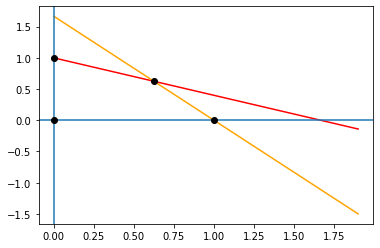

In [ ]:
#b) 
import numpy as np
import matplotlib.pyplot as plt

r1=0.05
r2=0.05, 
a12=0.6
a21=0.6
K=1

fp = (-K+a21*K)/(-1+a21*a12)
fp2 = (-K+a12*K)/(-1+a12*a21)

N1 = np.arange(0,2,0.1)
N2 = np.arange(0,2,0.1)

null_N1 = K-a21*N2
null_N2 = (K-N2)/a12

plt.plot(N1,null_N1,color='red')
plt.plot(N2,null_N2,color='orange')
plt.axvline(0,0)
plt.axhline(0,0)
plt.plot(0,0,'ko')
plt.plot(0,K,'ko')
plt.plot(K,0,'ko')
plt.plot(fp,fp2,'ko')
plt.show()

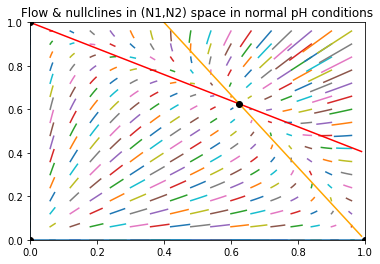

In [ ]:
#c) 
#We have a stable fixed point at (0.625,0.625) as solutions are converging towards this point.
#The other fixed points (0,1),(1,0),(0,0) are unstable as the solutions diverge from them
#Competetive symbiosis exists here.

import numpy as np
import matplotlib.pyplot as plt

dt=0.1
time=np.arange(0,5,dt)
N1=np.zeros(len(time))
N2=np.zeros(len(time))

r1=0.05
r2=0.05
a12=0.6
a21=0.6
K=1

for i in np.arange(0,1,0.06):
  for j in np.arange(0,1,0.06):
    for t in range(len(time)-1):
        N1[0] = i
        N2[0] = j
        N1[t+1] = N1[t] + dt * (r1 * N1[t]) * ((K-N1[t] - a21 * N2[t]) / K)
        N2[t+1] = N2[t] + dt * (r2 * N2[t]) * ((K-N2[t] - a12 * N1[t]) / K)
    plt.plot(N1, N2)

N1 = np.arange(0,1,0.01)
N2 = np.arange(0,1,0.01)

null_N1 = K-a21*N2
null_N2 = (K-N2)/a12

plt.plot(N1,null_N1,color='red')
plt.plot(N2,null_N2,color='orange')
plt.axvline(0,0)
plt.axhline(0,0)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(0,0,'ko')
plt.plot(0,K,'ko')
plt.plot(K,0,'ko')
plt.plot(fp,fp2,'ko')
plt.title('Flow & nullclines in (N1,N2) space in normal pH conditions')
plt.show()

The final population size of Gallaxea is 0.6249986972916074
The final population size of Pocillopora is 0.6250013027056781


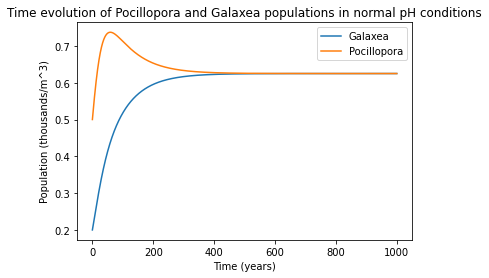

In [ ]:
#d) 

#The final population size in thousands/m3 for Galaxea is of 0.625 and for Pocillopora is of 0.625. They are at equilibrium.

import numpy as np
import matplotlib.pyplot as plt

r1 = 0.05
r2 = 0.05
a12 = 0.6
a21 = 0.6
K = 1 

tmax = 1000
dt = 0.1
time = np.arange(0,tmax,dt)
N1 = np.zeros(len(time))
N2 = np.zeros(len(time))

N1[0] = 0.2
N2[0] = 0.5

for t in range(len(time)-1):
  N1[t+1] = N1[t] + dt * (r1 * N1[t]) * ((K-N1[t] - a21 * N2[t]) / K)
  N2[t+1] = N2[t] + dt * (r2 * N2[t]) * ((K-N2[t] - a12 * N1[t]) / K)

G = N1[-1]
P = N2[-1]
print('The final population size of Gallaxea is',G)
print('The final population size of Pocillopora is',P)
plt.plot(time,N1,label='Galaxea')
plt.plot(time,N2,label='Pocillopora')
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Population (thousands/m^3)')
plt.title('Time evolution of Pocillopora and Galaxea populations in normal pH conditions')
plt.show()

The final population size of Gallaxea is 0.9843360718496866
The final population size of Pocillopora is 0.023266306516342372


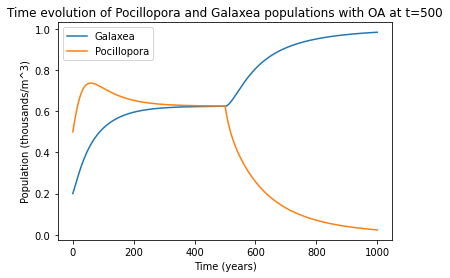

In [ ]:
#e)

#After 1000 years, Pocillopora is trending towards extinction due to the change in competition between the two species.
#Galaxea's population size increases drastically to 0.98 thousands/m3 while Pocillopora's decreases dramatically to 0.02 thousand/m3

import numpy as np
import matplotlib.pyplot as plt

r1 = 0.05
r2 = 0.05
a12 = 0.6
a21 = 0.6
K = 1 

tmax = 1000
dt = 0.1
time = np.arange(0,tmax,dt)
N1 = np.zeros(len(time))
N2 = np.zeros(len(time))

N1[0] = 0.2
N2[0] = 0.5

for t in range(len(time)-1):
  N1[t+1] = N1[t] + dt * (r1 * N1[t]) * ((K-N1[t] - a21 * N2[t]) / K)
  N2[t+1] = N2[t] + dt * (r2 * N2[t]) * ((K-N2[t] - a12 * N1[t]) / K)
  if time[t]==500:
    a12=1.1

G = N1[-1]
P = N2[-1]
print('The final population size of Gallaxea is',G)
print('The final population size of Pocillopora is',P)
plt.plot(time,N1,label='Galaxea')
plt.plot(time,N2,label='Pocillopora')
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Population (thousands/m^3)')
plt.title('Time evolution of Pocillopora and Galaxea populations with OA at t=500')
plt.show()